# Heart Disease Diagnosis

This Jupyter notebook provides a framework for analysing and modelling the **Heart Disease** dataset available on Kaggle.  The dataset contains 297 rows and 14 variables, including patient demographics (age, sex), clinical measurements (resting blood pressure, cholesterol, fasting blood sugar, etc.) and a diagnosis label indicating presence of heart disease.

Our goals are to:
1. Load and inspect the dataset.  
2. Perform exploratory data analysis (EDA) to understand feature distributions and relationships.  
3. Preprocess the data (handle missing values, encode categorical variables, scale features).  
4. Build and evaluate classification models (logistic regression, random forest) to predict heart disease.  
5. Interpret model results and identify the most influential risk factors.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset (ensure 'heart.csv' is in the same directory)
data = pd.read_csv('heart.csv')

# Display basic information
print('Dataset shape:', data.shape)
data.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check for missing values
print(data.isnull().sum())

# Basic statistics
data.describe()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


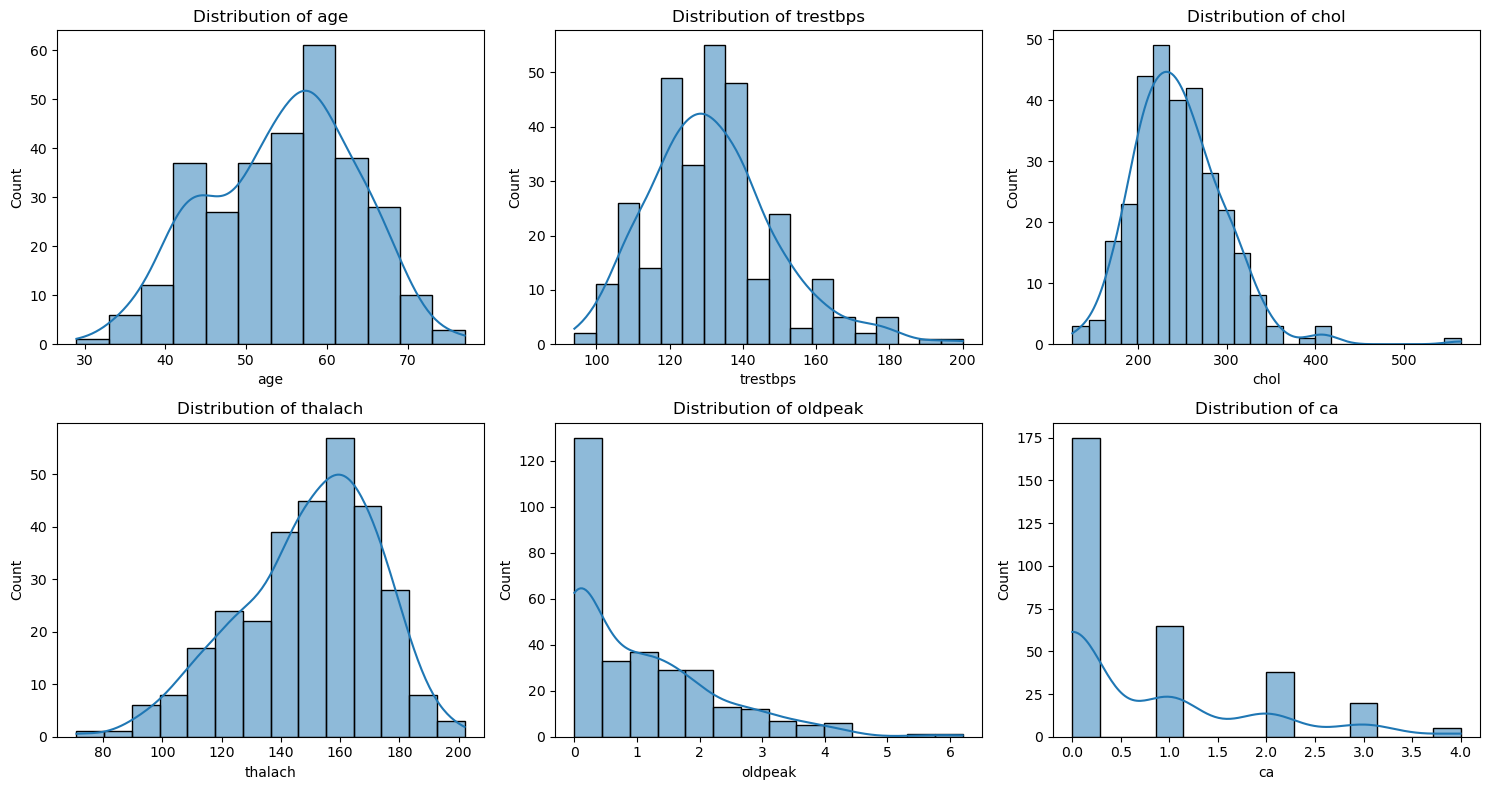

In [4]:
# Visualise distributions of some important features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

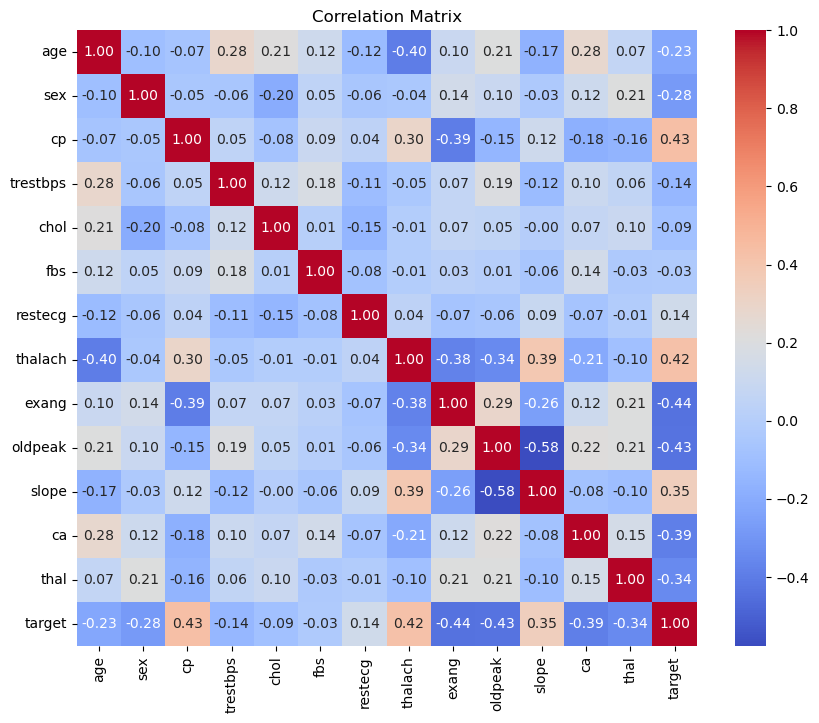

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Preprocess data
# Separate features and target (assuming 'target' is the diagnosis column; update if different)
X = data.drop(columns=['target'])
y = data['target']

# One-hot encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test_scaled)
print('Logistic Regression Report:', classification_report(y_test, y_pred))

# Train random forest classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Random Forest Report:', classification_report(y_test, rf_pred))

Logistic Regression Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Random Forest Report:               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Next Steps

- Perform hyperparameter tuning for the models to improve accuracy.
- Use cross‑validation to obtain more reliable performance estimates.
- Apply feature importance techniques (e.g., SHAP values) to interpret the influence of each feature on the prediction.
- Explore other algorithms such as Support Vector Machines or Gradient Boosting for potentially better performance.